<a href="https://colab.research.google.com/github/ava2467/ml-ai/blob/main/day_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/beer-servings (2).csv")

In [ ]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [ ]:
data.isna().sum()



Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.2+ KB


In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
#@title Filling missing values


In [ ]:
num_cols = data[[ 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [ ]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)


In [ ]:
num_cols = pd.DataFrame(num_cols, columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']],)

In [ ]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [ ]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol'], axis=1,inplace=True)

In [ ]:
data.head()


,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [ ]:
data= pd.concat([num_cols,data],axis=1)

In [ ]:
data.columns

Index([               ('beer_servings',),              ('spirit_servings',),
                      ('wine_servings',), ('total_litres_of_pure_alcohol',),
                               'country',                       'continent'],
      dtype='object')

In [ ]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [ ]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

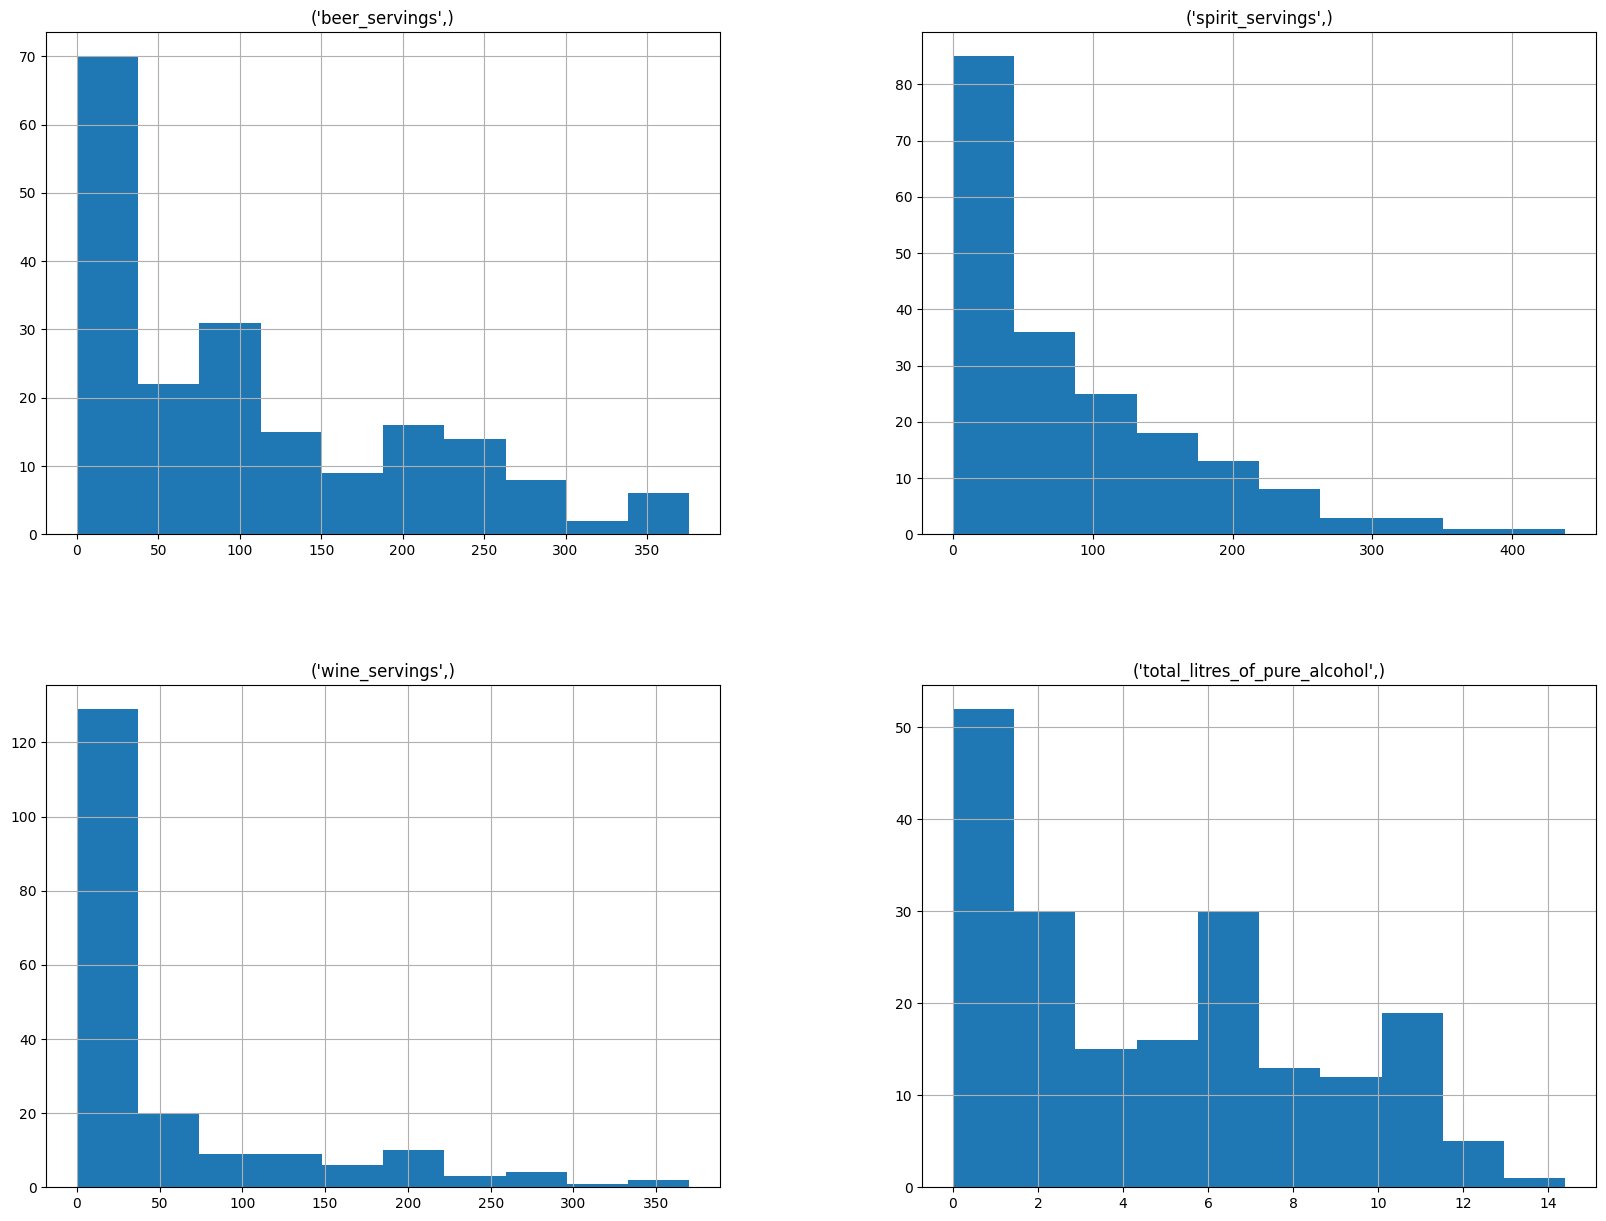

In [ ]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
#@title Default title text
data.columns


Index([               ('beer_servings',),              ('spirit_servings',),
                      ('wine_servings',), ('total_litres_of_pure_alcohol',),
                               'country',                       'continent'],
      dtype='object')

In [ ]:
data

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.000000,0.0,0.0,0.0,Afghanistan,Asia
1,89.000000,132.0,54.0,4.9,Albania,Europe
2,25.000000,0.0,14.0,0.7,Algeria,Africa
3,245.000000,138.0,312.0,12.4,Andorra,Europe
4,217.000000,57.0,45.0,5.9,Angola,Africa
...,...,...,...,...,...,...
188,105.124324,100.0,3.0,7.7,Venezuela,South America
189,111.000000,2.0,1.0,2.0,Vietnam,Asia
190,6.000000,0.0,0.0,0.1,Yemen,Asia
191,32.000000,19.0,4.0,2.5,Zambia,Africa


In [ ]:
data=pd.read_csv("/content/beer-servings (2).csv")

In [ ]:
data['beer_servings'] =data['beer_servings'].fillna(data['beer_servings'].median())

In [ ]:
for i in ['spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
  data[i] = data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [ ]:
data.country.nunique()

193

In [ ]:
data.drop('country',axis=1,inplace=True)

In [ ]:
data.shape

(193, 6)

outliers

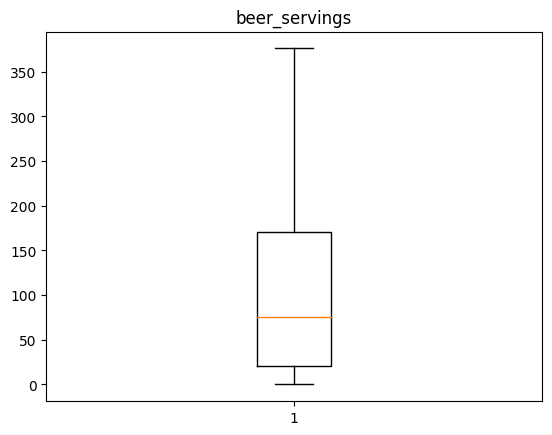

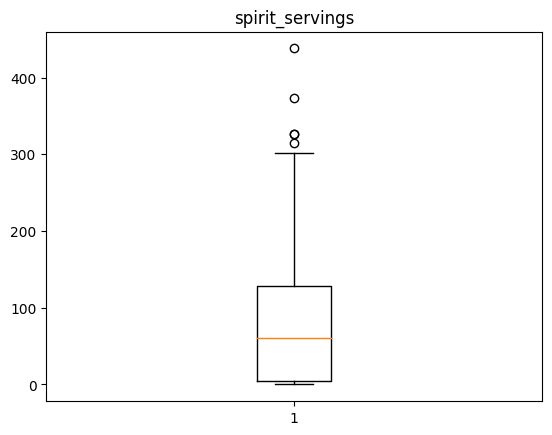

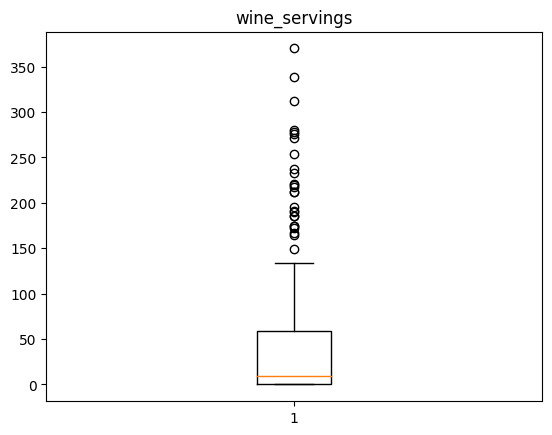

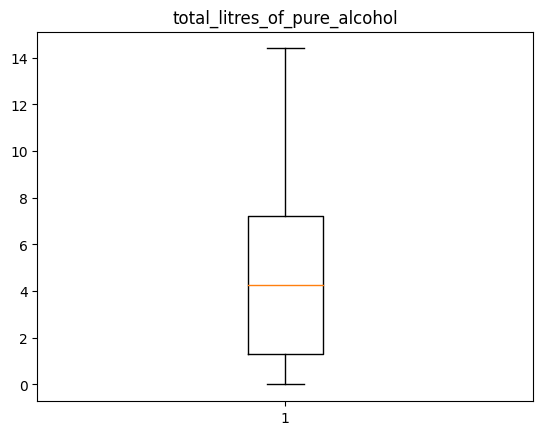

In [ ]:
for i in ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

<ipython-input-432-6c30a780d3b3>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
<ipython-input-432-6c30a780d3b3>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
<ipython-input-432-6c30a780d3b3>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
 

In [ ]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [ ]:
data['spirit_servings'].median()


60.0

In [ ]:
IQR=Q3-Q1

In [ ]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [ ]:
low_lim

-179.5

In [ ]:
up_lim


312.5

In [ ]:
outlier=[]
for x in data['spirit_servings']:
   if((x>up_lim)or(x<low_lim)):
    outlier.append(x)


In [ ]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
ind1=data['spirit_servings']<low_lim
data.loc[ind1].index


Int64Index([], dtype='int64')

In [ ]:
ind2=data['spirit_servings']>up_lim
data.loc[ind2].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
data.drop([15,68,73,141,144],inplace=True)

In [ ]:
data.head()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0.0,0.0,0.0,0.0,Asia
1,1,89.0,132.0,54.0,4.9,Europe
2,2,25.0,0.0,14.0,0.7,Africa
3,3,245.0,138.0,312.0,12.4,Europe
4,4,217.0,57.0,45.0,5.9,Africa


In [ ]:

plt.subplot()
plt.show()


In [ ]:
data.head()


In [ ]:
data=data.rename(columns={'Unnamed: 0':'Country'})

In [ ]:
data.head()

In [ ]:
plt.bar(data['Country'],data['Gold'])

In [ ]:
plt.bar(data['Country'], data['Gold'])
plt.title("countries with gold medals")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['Gold'].plot.bar()

In [ ]:
data=data.set_index('Country')

In [ ]:
data.head()

In [ ]:
data['Gold'].plot.bar()

In [ ]:
data['Gold'].sort_values(ascending=False)

In [ ]:
data['Gold'].sort_values(ascending=False).plot.bar()

In [ ]:
data[['Gold','Silver','Bronze']].plot.bar()

In [ ]:
countries=['Ind','USA','UK','UAE']
pop=[123,20,30,40]

In [ ]:
plt.pie(pop,labels=countries)
plt.show()